<a href="https://colab.research.google.com/github/NafiaAamir113/Check-crop/blob/main/Predicting_Molecular_Solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

#**Dataset**

In [2]:
# Load dataset from URL
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['logS'])
y = df['logS']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


#**Train and Save Linear Regression Model**

In [3]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Save the trained model
joblib.dump(lr, "solubility_model.pkl")
print("Model saved successfully as 'solubility_model.pkl'.")


Model saved successfully as 'solubility_model.pkl'.


#**Load the Saved Model and Make Predictions**

In [4]:
# Check if the model file exists
model_path = "solubility_model.pkl"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file '{model_path}' not found. Train and save the model first.")

# Load the trained model
lr_loaded = joblib.load(model_path)
print("Model loaded successfully!")

# Make predictions on test data
y_lr_test_pred = lr_loaded.predict(X_test)
print("Predictions:", y_lr_test_pred[:5])


Model loaded successfully!
Predictions: [-3.0572287  -7.77785827 -2.5501665  -2.01523582 -2.0637599 ]


#**Evaluate the Linear Regression Model**



In [5]:
# Calculate evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_lr_test_pred))
print("MSE:", mean_squared_error(y_test, y_lr_test_pred))
print("R² Score:", r2_score(y_test, y_lr_test_pred))

# Predict solubility for a new sample
new_sample = X_test.iloc[:1]
new_prediction = lr_loaded.predict(new_sample)
print("Predicted solubility (logS):", new_prediction[0])


MAE: 0.77983023265368
MSE: 1.0206953660861033
R² Score: 0.7891616188563282
Predicted solubility (logS): -3.057228702197173


#**Train and Evaluate Random Forest Model**

Random Forest R² Score: 0.8663842725648809


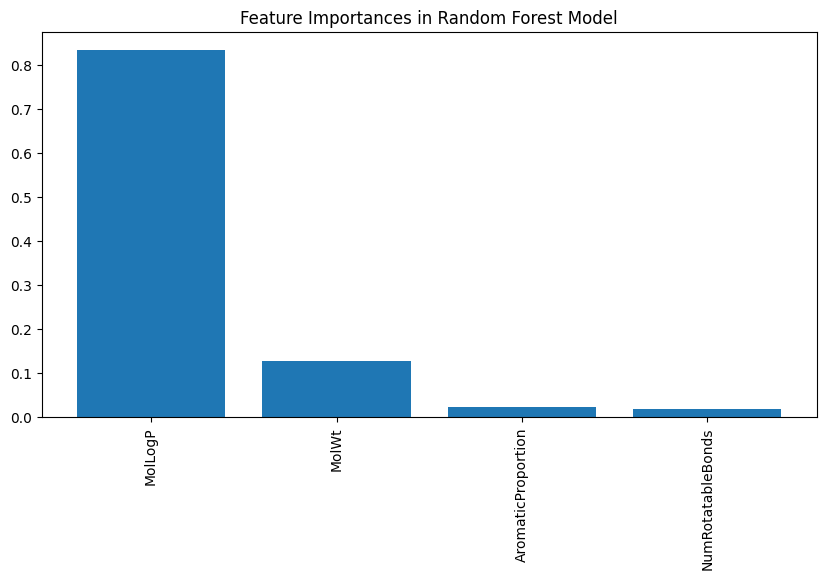

In [6]:
# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest R² Score:", r2_score(y_test, rf_pred))

# Plot feature importances
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), X.columns[sorted_idx], rotation=90)
plt.title("Feature Importances in Random Forest Model")
plt.show()


#**Hyperparameter Tuning for Random Forest**

In [7]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


#**Train and Evaluate XGBoost Model**

In [8]:
# Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test)

# Evaluate the model
print("XGBoost R² Score:", r2_score(y_test, xgb_pred))


XGBoost R² Score: 0.8624523574789782
